In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
# needed to balance the weights because 90% of the credit card transactions are legitimate 
# and around 10% is fraudulent
from sklearn.utils.class_weight import compute_sample_weight
import time

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(f'There are total {df.shape[0]} observations')
print(f'There are {df.shape[1]} total variables')

There are total 284807 observations
There are 31 total variables


In [4]:
# since the dataset here is small we replicate it 10x
n_replicas = 10

# we convert the dataframe into numpy array and use the axis=0 which duplicates the rows 
# and again coverts the array to the original pandas dataframe assigning the original column name to the new big_df
big_df = pd.DataFrame(np.repeat(df.values, n_replicas, axis = 0), columns=df.columns) 

print(f'There are total {big_df.shape[0]} observations')
print(f'There are {big_df.shape[1]} total variables')

big_df.head(15)

There are total 2848070 observations
There are 31 total variables


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
5,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
6,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
7,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
8,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
9,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


[0. 1.]
[2843150    4920]


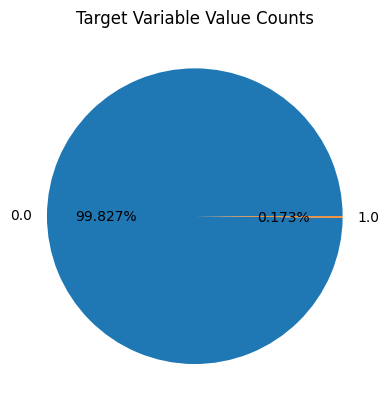

In [5]:
labels = big_df['Class'].unique()
print(labels)

sizes = big_df['Class'].value_counts().values
print(sizes)

# quick and easy
# plt.pie(sizes, labels=labels, autopct='%1.3f%%')
# plt.title('Target Variable Value Counts')

# more flexiblity and control
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()


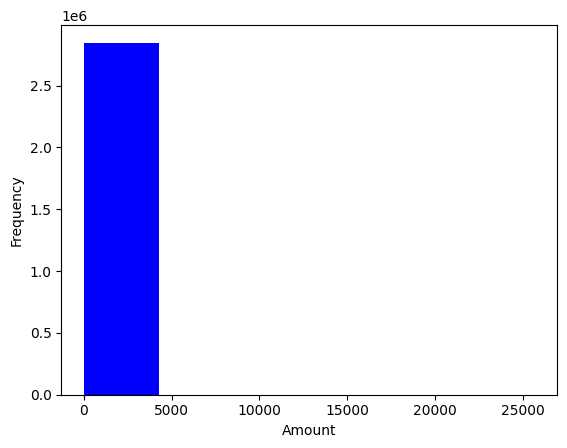

The maximum value is:  25691.16
The minimum value is:  0.0
The transaction amount that is greater than or equals to 90% of the amount is:  203.0


In [6]:
# analyzing histogram to see the amounts distributions, range and 90th percentile of amount values
plt.hist(big_df['Amount'], bins=6, color='blue')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

print('The maximum value is: ', big_df['Amount'].max())
print('The minimum value is: ', big_df['Amount'].min())
print('The transaction amount that is greater than or equals to 90% of the amount is: ', np.percentile(big_df['Amount'], 90))

In [7]:
# standarize the data by transforming mean to 0 and standard deviation to 1 using StandardScalar() 
# for all the rows and from column 1 to 29 (only integer location is used) iloc[:, 1:30]
big_df.iloc[:, 1:30] = StandardScaler().fit_transform(big_df.iloc[:, 1:30])
# converting data into numpy array after scaling as the array will lose the column names making it harder to scale.
df_matrix = big_df.values

# storing the independent variables 2d array in X
X = df_matrix[:, 1:30]
# storing the dependent variables 1d array in y
y = df_matrix[:, 30]

# print the rows and column of X and y
print(f'X shape is: {X.shape} and y shape is: {y.shape}')

X shape is: (2848070, 29) and y shape is: (2848070,)


In [8]:
# using stratify=y to balace the train test split which is important in unbalanced dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
print(f'Shape of X_train: {X_train.shape}. Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}. Shape of y_test: {y_test.shape}')

Shape of X_train: (1993649, 29). Shape of y_train: (1993649,)
Shape of X_test: (854421, 29). Shape of y_test: (854421,)


In [9]:
# address the class imabalance issue, if the target variable value is dominated by a specific value 
# we address the imbalace to remove the bias
weighted_y_train = compute_sample_weight('balanced', y_train)

from sklearn.tree import DecisionTreeClassifier
sklearn_dt = DecisionTreeClassifier(max_depth = 4, random_state = 4)

# measuring the elapsed time
t0 = time.time()
sklearn_dt.fit(X_train, y_train, sample_weight = weighted_y_train)
sklearn_time = time.time() - t0
print(f'Sklearn training time is: {sklearn_time:.3f}')

Sklearn training time is: 18.482


In [10]:
# using SnapML(not available on arm mac) to accelerate the training process
# from snapml import DecisionTreeClassifier

# snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=4, n_jobs = 4)

# t0 = time.time()
# snapml_dt.fit(X_train, y_train, sample_weight=weighted_y_train)
# snapml_time = time.time() - t0
# print(f'SnapML training time is: {snapml_time:.3f}')

In [11]:
# training_speedup = sklearn_time/snapml_time
# print('[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : {0:.2f}x '.format(training_speedup))

# run inference and compute the probabilities of the test samples 
# to belong to the class of fraudulent transactions
sklearn_pred = sklearn_dt.predict_proba(X_test)[:,1]

# evaluate the Compute Area Under the Receiver Operating Characteristic 
# Curve (ROC-AUC) score from the predictions
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

# run inference and compute the probabilities of the test samples
# to belong to the class of fraudulent transactions
# snapml_pred = snapml_dt.predict_proba(X_test)[:,1]

# evaluate the Compute Area Under the Receiver Operating Characteristic
# Curve (ROC-AUC) score from the prediction scores
# snapml_roc_auc = roc_auc_score(y_test, snapml_pred)   
# print('[Snap ML] ROC-AUC score : {0:.3f}'.format(snapml_roc_auc))

[Scikit-Learn] ROC-AUC score : 0.974


In [18]:
X_low_train = X_train[:100]
y_low_train = y_train[:100]

array([[-2.41230239e-02,  6.75182913e-01, -1.33033206e+00,
        -4.08534733e-01,  9.24282071e-01, -4.56250458e-01,
         1.09568076e+00,  1.12634038e-01, -9.44891952e-01,
        -9.63470045e-01,  6.56515867e-01,  9.30948290e-01,
         7.44670860e-01, -4.31477452e-01, -1.61534380e+00,
         1.46797716e-01,  4.91307910e-01,  4.71348083e-01,
         4.01592385e-02, -5.72454968e-02,  3.85179291e-01,
         9.72207673e-01,  4.41162169e-02,  4.66072757e-01,
        -5.69734100e-01,  1.06663138e+00, -2.67592313e-01,
         1.00750472e-01, -3.33824975e-02],
       [-2.65794476e+00, -2.07235353e+00, -4.90799905e-01,
         8.71592175e-01,  1.36762161e+00,  1.00692906e+00,
        -2.90049548e-01,  4.51155373e-01,  6.47962059e-01,
         5.49015391e-01,  6.31975066e-01,  5.02114747e-01,
         7.94440623e-02,  5.17604562e-02,  1.41214022e+00,
         3.06624532e-01, -5.78029392e-01, -1.27944878e-01,
        -6.49789507e-01, -3.01800369e+00, -3.93216523e-01,
         2.02

In [13]:
# # Support Vector Classifer for classification task 
# from sklearn.svm import LinearSVC

# X_train

# # loss = 'hinge' is a traditional SVN which is faster but not smooth,
# # there is default loss = 'squared_hinge' which squares the penalty for misclassified and out of margin points
# # fit_intercept = 'False' because we have already standardarized our data mean=0 
# sklearnSVM = LinearSVC(class_weight = 'balanced', random_state = 4, fit_intercept = False, loss = 'hinge', max_iter=5000, verbose=1)
# t0 = time.time()
# # we do not use the sample_weight= parameter in sklearnSVM.fit() here as Decision Tree above 
# # because we are using class_weight = 'balanced'
# # it is possible to use weighted_y_train = compute_sample_weight('balanced', y_train) 
# # and pass it to sample_weight parameter of the LinearSVC.fit()
# sklearnSVM.fit(X_train, y_train)
# SVMtime = time.time() - t0
# print(f'Training time of SVN: {SVMtime:.3f}')